In [1]:
import cv2
from matplotlib.pyplot import imshow
import numpy as np

In [2]:
goku_image = cv2.imread("Data/Goku.jpg", cv2.IMREAD_COLOR)
dbz_image  = cv2.imread("Data/DBZ.png", cv2.IMREAD_COLOR)

dbz_new_shape = (int(goku_image.shape[1]/3), int(goku_image.shape[0]/3)) 
dbz_image = cv2.resize(dbz_image, dbz_new_shape, interpolation = cv2.INTER_CUBIC)

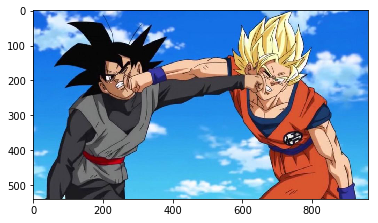

In [3]:
imshow(cv2.cvtColor(goku_image, cv2.COLOR_BGR2RGB) )

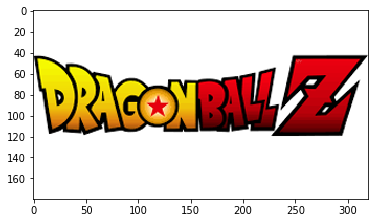

In [4]:
imshow(cv2.cvtColor(dbz_image, cv2.COLOR_BGR2RGB) )

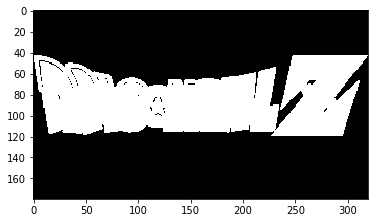

In [5]:
gray_dbz = cv2.cvtColor(dbz_image, cv2.COLOR_BGR2GRAY)
ret, mask_dbz = cv2.threshold(gray_dbz,220,255,cv2.THRESH_BINARY)
nev_mask_dbz = cv2.bitwise_not(mask_dbz)
imshow(nev_mask_dbz, cmap='gray' )

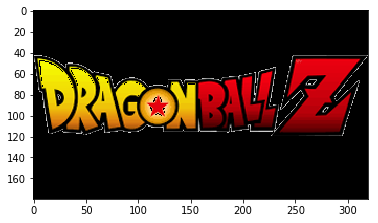

In [6]:
logo_dbz = cv2.bitwise_and(dbz_image, dbz_image, mask= nev_mask_dbz)
imshow(cv2.cvtColor(logo_dbz, cv2.COLOR_BGR2RGB) )

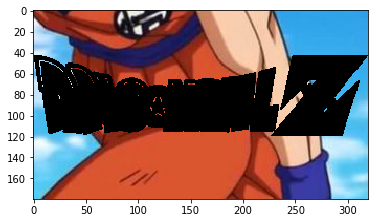

In [7]:
roi_area = goku_image[-logo_dbz.shape[0]:, -logo_dbz.shape[1]:]
roi_logo_cutout = cv2.bitwise_and(roi_area, roi_area, mask = mask_dbz)
imshow(cv2.cvtColor(roi_logo_cutout, cv2.COLOR_BGR2RGB) )

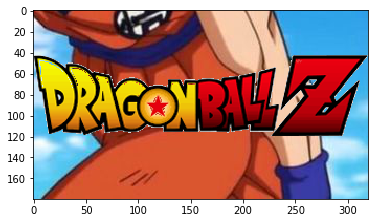

In [8]:
roi_logo = cv2.add(roi_logo_cutout, logo_dbz)
imshow(cv2.cvtColor(roi_logo, cv2.COLOR_BGR2RGB) )

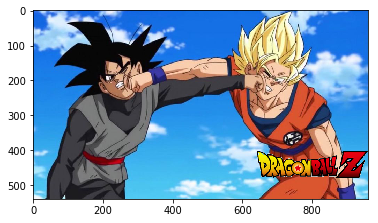

In [9]:
goku_image[-logo_dbz.shape[0]:, -logo_dbz.shape[1]:] = roi_logo
imshow(cv2.cvtColor(goku_image, cv2.COLOR_BGR2RGB) )